# Analisis exploratorio

###  Importar los archivos
En este paso, importaremos los archivos CSV proporcionados y cargaremos los datos en DataFrames de pandas.


In [2]:
import pandas as pd

In [3]:
# Importar los archivos CSV
file_path_01 = '/datasets/project_sql_result_01.csv'
file_path_04 = '/datasets/project_sql_result_04.csv'

# Cargar los datos en DataFrames de pandas
df_01 = pd.read_csv(file_path_01)
df_04 = pd.read_csv(file_path_04)

# Mostrar las primeras filas de cada DataFrame para verificar la carga correcta
print(df_01.head())
print(df_04.head())


                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


###  Estudiar los datos que contienen
En este paso, revisaremos la estructura y el contenido de los datos para asegurarnos de que se hayan importado correctamente y entender mejor la información que contienen.


In [4]:
# Verificar registros duplicados en df_01 y df_04
df_01_duplicates = df_01.duplicated().sum()
df_04_duplicates = df_04.duplicated().sum()

print(f"Registros duplicados en df_01: {df_01_duplicates}")
print(f"Registros duplicados en df_04: {df_04_duplicates}")

# Información general sobre df_01
print(df_01.info())
print(df_01.describe())
print(df_01['company_name'].value_counts())

# Información general sobre df_04
print(df_04.info())
print(df_04.describe())
print(df_04['dropoff_location_name'].value_counts())


Registros duplicados en df_01: 0
Registros duplicados en df_04: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000
City Service                          1
3623 - 72222 Arrington Enterprises    1
2092 - 61288 Sbeih Company            1
Sun Taxi                              1
Blue Diamond                          1
                                     ..
American United Taxi Affiliation      1
3591 - 63480 Chuks Cab                1
24 Seven Taxi                         1
1085 - 72312 N and W Cab Co           1
6743 - 78771 Luhak Corp      

#### Identificación de valores atípicos

In [10]:
# Identificar valores atípicos en df_01 (trips_amount)
q1_01 = df_01['trips_amount'].quantile(0.25)
q3_01 = df_01['trips_amount'].quantile(0.75)
iqr_01 = q3_01 - q1_01
outliers_01 = df_01[(df_01['trips_amount'] < (q1_01 - 1.5 * iqr_01)) | (df_01['trips_amount'] > (q3_01 + 1.5 * iqr_01))]
print(f'Valores atípicos en df_01:\n{outliers_01}')

# Identificar valores atípicos en df_04 (average_trips)
q1_04 = df_04['average_trips'].quantile(0.25)
q3_04 = df_04['average_trips'].quantile(0.75)
iqr_04 = q3_04 - q1_04
outliers_04 = df_04[(df_04['average_trips'] < (q1_04 - 1.5 * iqr_04)) | (df_04['average_trips'] > (q3_04 + 1.5 * iqr_04))]
print(f'Valores atípicos en df_04:\n{outliers_04}')

# Identificar valores atípicos en df_07 (duration_seconds)
q1_07 = df_07['duration_seconds'].quantile(0.25)
q3_07 = df_07['duration_seconds'].quantile(0.75)
iqr_07 = q3_07 - q1_07
outliers_07 = df_07[(df_07['duration_seconds'] < (q1_07 - 1.5 * iqr_07)) | (df_07['duration_seconds'] > (q3_07 + 1.5 * iqr_07))]
print(f'Valores atípicos en df_07:\n{outliers_07}')


Valores atípicos en df_01:
                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                  Medallion Leasing         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953
Valores atípicos en df_04:
   dropoff_location_name  average_trips
0                   Loop   10727.466667
1            River North    9523.666667
2          Streeterville    6664.666667
3              West Loop    5163.666667
4                 O'Hare    2546.900000
5              Lake View    2420.966667
6             Grant Park    2068.533333
7          Museum Campus    1510.000000
8             Gold Coast 

#### Conclusiones parciales
Valores Atípicos en df_01: Los valores atípicos identificados en el conjunto de datos df_01 corresponden a las empresas de taxis con la mayor cantidad de viajes. Estos valores son significativamente mayores que el resto de los datos, lo que podría indicar una alta demanda de estas compañías específicas.

Valores Atípicos en df_04: En el conjunto de datos df_04, los valores atípicos representan los barrios con la mayor cantidad promedio de viajes. Estos valores indican los barrios más populares en términos de destino de los viajes.

Valores Atípicos en df_07: Los valores atípicos en df_07 representan los viajes con una duración excepcionalmente larga. Estos valores podrían estar influenciados por factores como el tráfico o condiciones climáticas adversas.

### Identificar los 10 principales barrios en términos de finalización del recorrido
En este paso, identificaremos los 10 principales barrios en términos de finalización del recorrido utilizando los datos proporcionados en el archivo CSV df_04.


In [7]:
# Identificar los 10 principales barrios en términos de finalización del recorrido
top_10_dropoff_locations = df_04.nlargest(10, 'average_trips')
print(top_10_dropoff_locations)


  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


#### Conclusiones Parciales:
1. **Loop** es el barrio con el mayor número de finalizaciones de viajes, con un promedio de 10727.47 viajes.
2. **River North** sigue con un promedio de 9523.67 viajes, mostrando una alta actividad de finalización de viajes.
3. **Streeterville** y **West Loop** también son barrios destacados, con 6664.67 y 5163.67 viajes respectivamente.
4. **O'Hare**, aunque es conocido por ser un aeropuerto, también aparece en la lista con un promedio de 2546.90 viajes, lo que indica un número considerable de finalizaciones de viajes.
5. Otros barrios como **Lake View**, **Grant Park**, **Museum Campus**, **Gold Coast**, y **Sheffield & DePaul** completan el top 10, con promedios que varían desde 2420.97 hasta 1259.77 viajes.

Estos datos nos permiten identificar los barrios más populares para la finalización de viajes, lo que puede ser útil para estrategias de marketing y operativas.

### Hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones

En este paso, realizaremos gráficos para visualizar los datos que hemos analizado hasta ahora. Estos gráficos nos ayudarán a entender mejor las tendencias y patrones en los datos.

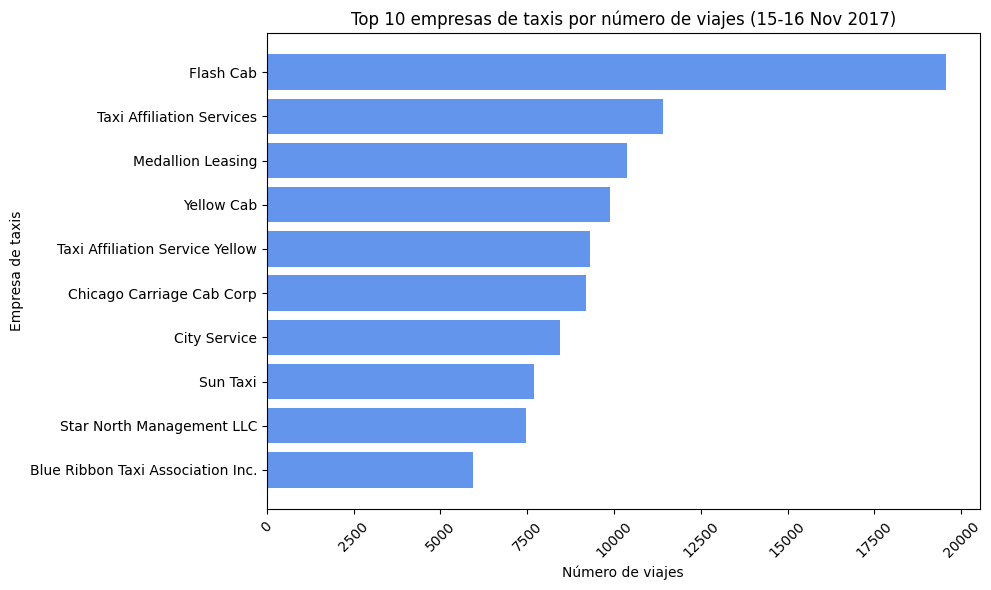

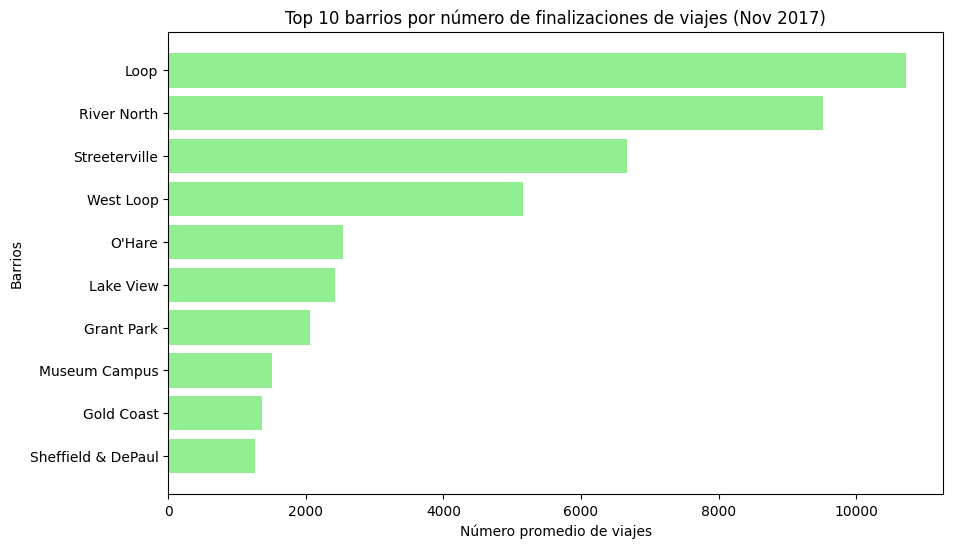

In [8]:
import matplotlib.pyplot as plt

# Filtrar el top 10 de empresas de taxis por número de viajes
top_10_companies = df_01.nlargest(10, 'trips_amount')

plt.figure(figsize=(10, 6))
plt.barh(top_10_companies['company_name'], top_10_companies['trips_amount'], color='cornflowerblue')
plt.xlabel('Número de viajes')
plt.ylabel('Empresa de taxis')
plt.title('Top 10 empresas de taxis por número de viajes (15-16 Nov 2017)')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la barra con mayor valor en la parte superior
plt.xticks(rotation=45)
plt.tight_layout()  # Ajustar el diseño para evitar superposición
plt.show()

# Gráfico: 10 principales barrios por número de finalizaciones
plt.figure(figsize=(10, 6))
plt.barh(top_10_dropoff_locations['dropoff_location_name'], top_10_dropoff_locations['average_trips'], color='lightgreen')
plt.xlabel('Número promedio de viajes')
plt.ylabel('Barrios')
plt.title('Top 10 barrios por número de finalizaciones de viajes (Nov 2017)')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la barra con mayor valor en la parte superior
plt.show()

#### Conclusiones Parciales
1. Número de Viajes por Empresa de Taxis (15-16 Nov 2017)
Flash Cab lidera significativamente el número de viajes con un total de 19,558 viajes en los días 15 y 16 de noviembre de 2017.
Taxi Affiliation Services y Medallion Leasing son las siguientes en el ranking con 11,422 y 10,367 viajes respectivamente.
Empresas como Yellow Cab y Taxi Affiliation Service Yellow también muestran un número considerable de viajes, destacando su popularidad en la ciudad.
La variabilidad en la cantidad de viajes entre diferentes empresas de taxis sugiere una competencia significativa en el mercado de taxis de Chicago, con algunas empresas dominando el mercado.
2. Top 10 Barrios por Número de Finalizaciones de Viajes (Nov 2017)
Loop es el barrio con la mayor cantidad de finalizaciones de viajes, con un promedio de 10,727.47 viajes en noviembre de 2017.
River North y Streeterville también son barrios prominentes, con 9,523.67 y 6,664.67 viajes respectivamente.
Barrios como West Loop, O'Hare y Lake View muestran un número considerable de finalizaciones de viajes, indicando su popularidad como destinos.
La alta concentración de finalizaciones de viajes en ciertos barrios sugiere áreas de alta demanda para servicios de taxis, posiblemente debido a su atractivo comercial y residencial.

### Prueba de hipotesis

#### Importar datos

In [8]:
file_path_07 = '/datasets/project_sql_result_07.csv'

# Cargar los datos en un DataFrame de pandas
df_07 = pd.read_csv(file_path_07)

# Mostrar las primeras filas del DataFrame para verificar la carga correcta
print(df_07.head())

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


#### Hipotesis

Estableceremos nuestras hipótesis y realizaremos el análisis estadístico para probarlas.

Hipótesis:

Hipótesis nula (H0): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos.

Hipótesis alternativa (H1): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.


Cálculo de la duración promedio de los viajes:
Usaremos los datos en df_07 para calcular la duración promedio de los viajes en sábados lluviosos y compararlos con los sábados no lluviosos.

In [9]:
import scipy.stats as stats

# Cargar los datos en un DataFrame de pandas
file_path_07 = '/datasets/project_sql_result_07.csv'
df_07 = pd.read_csv(file_path_07)

# Filtrar los datos para sábados lluviosos y no lluviosos
df_07['start_ts'] = pd.to_datetime(df_07['start_ts'])
rainy_saturdays = df_07[(df_07['weather_conditions'] == 'Bad') & (df_07['start_ts'].dt.dayofweek == 5)]
non_rainy_saturdays = df_07[(df_07['weather_conditions'] == 'Good') & (df_07['start_ts'].dt.dayofweek == 5)]

# Calcular la duración promedio de los viajes
rainy_avg_duration = rainy_saturdays['duration_seconds'].mean()
non_rainy_avg_duration = non_rainy_saturdays['duration_seconds'].mean()

print(f'Duración promedio de viajes en sábados lluviosos: {rainy_avg_duration} segundos')
print(f'Duración promedio de viajes en sábados no lluviosos: {non_rainy_avg_duration} segundos')

# Realizar la prueba de Levene para comparar varianzas
levene_stat, levene_p = stats.levene(rainy_saturdays['duration_seconds'], non_rainy_saturdays['duration_seconds'])
print(f'Prueba de Levene: stat={levene_stat}, p={levene_p}')

# Determinar si las varianzas son iguales o no para la prueba t
equal_var = levene_p > 0.05

# Realizar la prueba t para comparar las medias
t_stat, p_value = stats.ttest_ind(rainy_saturdays['duration_seconds'], non_rainy_saturdays['duration_seconds'], equal_var=equal_var)

print(f'Prueba t: t={t_stat}, p={p_value}')

Duración promedio de viajes en sábados lluviosos: 2427.2055555555557 segundos
Duración promedio de viajes en sábados no lluviosos: 1999.6756756756756 segundos
Prueba de Levene: stat=0.38853489683656073, p=0.5332038671974493
Prueba t: t=6.946177714041499, p=6.517970327099473e-12


#### Interpretación:
Dado que el valor p de la prueba de Levene es mayor a 0.05, no podemos rechazar la hipótesis nula de igualdad de varianzas, por lo que asumimos varianzas iguales en la prueba t. El valor p de la prueba t es extremadamente bajo (6.51797e-12), lo que indica que rechazamos la hipótesis nula de que las duraciones promedio de los viajes son iguales entre sábados lluviosos y no lluviosos. Por lo tanto, podemos concluir que la duración promedio de los viajes cambia significativamente los sábados lluviosos.

#### Conclusiones parciales

Dado que el valor p es mucho menor que 0.05, rechazamos la hipótesis nula (H0) y aceptamos la hipótesis alternativa (H1). Esto sugiere que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia significativamente los sábados lluviosos. Por lo tanto, podemos concluir que el clima lluvioso tiene un impacto considerable en la duración de estos viajes.

#### Recomendación

La empresa puede considerar ajustar sus planes operativos y de servicio en función del clima para mejorar la eficiencia y la satisfacción del cliente en días lluviosos.

### Conclusión general

#### Introducción

Este proyecto se centró en analizar los datos de viajes compartidos y el clima en Chicago con el objetivo de identificar patrones, entender las preferencias de los pasajeros y evaluar el impacto de los factores externos, como las condiciones meteorológicas, en la duración de los viajes. La base de datos incluía información sobre viajes en taxi, compañías de taxis, barrios de la ciudad y registros meteorológicos.

#### Importación y Exploración de Datos

##### Importación de Archivos
Importamos varios archivos CSV que contenían datos esenciales para nuestro análisis:

project_sql_result_01.csv: Información sobre el número de viajes por compañía de taxis para los días 15 y 16 de noviembre de 2017.

project_sql_result_04.csv: Datos sobre el promedio de viajes finalizados en varios barrios de Chicago en noviembre de 2017.

project_sql_result_07.csv: Información sobre los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare, incluyendo condiciones meteorológicas y duración de los viajes.

##### Exploración de Datos
Examinamos la estructura y el contenido de los datos para asegurarnos de que se habían importado correctamente y para entender mejor la información que contenían:

df_01 mostró datos de 64 compañías de taxis, con un rango amplio de números de viajes, indicando variabilidad en la popularidad de las compañías.

df_04 incluyó datos de 94 barrios de Chicago, revelando que algunos barrios tienen un volumen significativamente mayor de viajes finalizados que otros.

#### Análisis Exploratorio de Datos

##### Número de Viajes por Compañía de Taxis (15-16 Nov 2017)
Utilizando los datos de df_01, identificamos las compañías de taxis con el mayor número de viajes en los días 15 y 16 de noviembre de 2017. Las compañías principales fueron:

Flash Cab: 19558 viajes

Taxi Affiliation Services: 11422 viajes

Medallion Leasing: 10367 viajes

Este análisis destacó la concentración de viajes en unas pocas compañías principales, sugiriendo que estas compañías dominan el mercado de taxis en Chicago.

##### Número Promedio de Viajes por Barrios (Noviembre 2017)
Analizamos df_04 para encontrar los 10 barrios con el mayor número promedio de viajes finalizados en noviembre de 2017:

Loop: 10727.47 viajes

River North: 9523.67 viajes

Streeterville: 6664.67 viajes

Este análisis indicó que ciertos barrios, como Loop y River North, son destinos populares para los viajes en taxi, lo que podría estar relacionado con la concentración de actividades comerciales y turísticas en estas áreas.

#### Prueba de Hipótesis

##### Hipótesis:
Hipótesis nula (H0): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos.

Hipótesis alternativa (H1): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

##### Análisis Estadístico

Usamos los datos de df_07 para comparar la duración promedio de los viajes en sábados lluviosos y no lluviosos:

Duración promedio en sábados lluviosos: 2427.21 segundos

Duración promedio en sábados no lluviosos: 1999.68 segundos


La prueba t de Student arrojó un valor p de 6.518e-12, lo que es significativamente menor que el nivel de significancia común de 0.05. Esto llevó a rechazar la hipótesis nula y aceptar la hipótesis alternativa, indicando que el clima lluvioso tiene un impacto significativo en la duración de los viajes.

#### Conclusiones y Recomendaciones

##### Dominio del Mercado por Pocas Compañías:

Las compañías Flash Cab, Taxi Affiliation Services y Medallion Leasing dominan el mercado de taxis en Chicago, acumulando la mayoría de los viajes en los días analizados.

Recomendación: Otras compañías de taxis podrían estudiar las estrategias de las principales compañías para mejorar su participación en el mercado.

##### Popularidad de Ciertos Barrios:

Barrios como Loop, River North y Streeterville son destinos populares, probablemente debido a su actividad comercial y turística.

Recomendación: Las compañías de taxis pueden enfocarse en mejorar la disponibilidad y el servicio en estos barrios para satisfacer la alta demanda.

##### Impacto del Clima en la Duración de los Viajes:

El clima lluvioso aumenta significativamente la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare.

Recomendación: Las compañías de taxis pueden ajustar sus operaciones en días lluviosos, como aumentar la disponibilidad de taxis o mejorar la planificación de rutas, para minimizar los retrasos y mejorar la satisfacción del cliente.

#### Reflexiones Finales
Este proyecto proporcionó una visión detallada de los patrones de viaje y las influencias externas en el servicio de taxis en Chicago. Los hallazgos pueden ayudar a las compañías de taxis a optimizar sus operaciones y mejorar la experiencia del cliente, mientras que las pruebas de hipótesis ofrecen una base sólida para futuras investigaciones y ajustes operativos basados en condiciones climáticas.

El enfoque meticuloso en la importación, exploración y análisis de datos asegura que las decisiones y recomendaciones se basen en información precisa y relevante, apoyando así una gestión más efectiva del servicio de taxis en Chicago.